## For building a SynD model from my D1D2 MSM data

In [1]:
import pickle
import numpy as np
from synd.models.discrete.markov import MarkovGenerator
from synd.core import load_model

In [2]:
from scipy import sparse
from scipy.cluster.vq import vq

### First, load in the MSM and features

In [3]:
# Read previous data
model_name = "2024-06-05_D1D2_13k_cfeats_final"
with open(f'{model_name}/final.pickle','rb') as file:
    [final_cluster, final_dtrajs, final_count, final_msm] = pickle.load(file)

In [7]:
# Read previous data
model_name = "2024-06-05_D1D2_13k_cfeats_final"
with open(f'{model_name}/final-bmsm.pickle','rb') as file:
    final_bmsm = pickle.load(file)

In [6]:
# load input feature data
oa1 = np.load("oa1.npy")
oa2 = np.load("oa2.npy")
tt = np.load("tt.npy")
c2 = np.load("c2.npy")
m1x1 = np.load("m1x1.npy")
m2x1 = np.load("m2x1.npy")

# processed and standardized features
features = np.load("curated_features.npy")

In [8]:
features[0]

array([0.29875837, 0.3843302 , 0.40290088, 0.01654467, 0.72834116,
       0.59148152, 0.00992387, 0.26018641])

### Define backmapping coordinates

Grab the frame corresponding to each cluster center:

In [9]:
# frame index of each cluster
frames, _ = vq(final_cluster.cluster_centers, features)
print(f"frame index per cluster:\n {frames}")

frame index per cluster:
 [118478 368092   9398 385315 165862 574104 105909 660681 704186 169697
 691085 499558 610664 127903 377764  80702 507418 704586 594528 343267
 289486 191706 347408  15374 118990 475254 261982 355643   3483 387044
 688361 579894 672437 702282 593973 362185 307370 569799 130765 429874
 693319 397828  96580 524899 573518 598224 135726 163308 512573  42189
  10011  17227 227416 333420 540364 698743 232030  77273 278216 256134
 548447    869  44305 337077 219450 466735 423269 550190  88941 120321
 652795  38106 223320  95278 124841  87466 368679 300922 658125 552327
 621626   9283  16669 462411 406189  54028  65190 355139   5007 477758
 654734 347808  13762 255475 501499 351506 448182 519162 414665 166847
 507867 181188 270063 658996 476252  33900 705559 566054  25744 655200
 118732 207941 357730 541375 511342 697347 388672 315679 590074  37605
 314302 495334 465976 436481 570308 438353 511051 210875 186190 458723
 552646 683354 683374 214690 703207 284695  55590  

I need to create a dict that maps each cluster to the pcoord space, e.g.
``` Python
{0: array([0.19300674, ...]),
 1: array([0.14842148, ...]),
 2: array([0.12663524, ...]),
 3: array([0.16085377, ...]),
 ...
```

In [10]:
oa1[frames]

array([ 4.77219963, 36.04339981, 18.14169884, 14.05109978, 39.82769775,
       18.61839867, 31.12109947, 18.24239922,  9.75969982, 37.3689003 ,
       35.62680054, 39.19549942, 42.25709915, 16.10089874, 36.39319992,
       29.35380173, 31.77759933,  7.74919987, 33.29919815, 32.31710052,
       31.24170113, 37.03579712, 37.82979965, 11.93729973,  8.57849979,
       37.35029984, 37.54539871, 27.72140121, 18.21999931,  4.51889992,
       41.2140007 , 38.59629822, 38.32780075,  9.37879944, 33.35150146,
       34.46980286, 10.99239922, 13.74480057, 17.76479912, 40.32149887,
       30.00690079, 37.1242981 , 14.37609959, 37.96510315, 18.0156002 ,
       38.4326973 , 35.43169785, 34.4958992 , 33.88619995, 37.26259995,
       18.49340057, 10.88400078, 40.30900192, 40.45479965,  7.74580002,
       16.04329872, 38.64539719, 27.68869972, 36.06369781, 36.81939697,
        8.6427002 , 17.93009949, 38.86400223, 32.86199951, 32.90610123,
       27.67770004, 41.37120056,  6.3902998 , 35.46989822,  5.91

In [11]:
# this should give me the original feat values at each cluster center
pcoords = np.column_stack((oa1[frames],
                           oa2[frames],
                           tt[frames],
                           c2[frames],
                           m1x1[frames],
                           m2x1[frames],
                           ))

In [12]:
pcoords.shape

(250, 6)

In [13]:
# now I just need the keys of the dict, which is just the cluster index
c_index = [i for i in range(pcoords.shape[0])]

In [14]:
# okay, now make it into a dict
backmapper = dict(zip(c_index,pcoords))

In [15]:
backmapper

{0: array([  4.77219963,   7.3592    ,   4.4804    ,  51.88809967,
        -87.27320862, -77.54160309]),
 1: array([ 36.04339981,  38.47430038,  14.228     ,  55.29389954,
        178.18579102, 165.48548889]),
 2: array([ 18.14169884,  20.65819931,   8.63210011,  32.35569763,
        168.49539185, -62.6576004 ]),
 3: array([ 14.05109978,   7.81619978,   4.8489    ,  47.92959976,
        -66.60560608, -72.4285965 ]),
 4: array([ 39.82769775,  42.65999985,  15.25689983,  70.5460968 ,
        173.01791382, 175.7848053 ]),
 5: array([  18.61839867,   17.7656002 ,    6.7656    ,   46.33819962,
         -65.90750885, -171.13938904]),
 6: array([  31.12109947,   37.69610214,   13.7026    ,   54.24900055,
         164.20439148, -172.95570374]),
 7: array([ 18.24239922,  18.30189896,   4.8504    ,  63.93740082,
        -64.09080505, -55.54860687]),
 8: array([  9.75969982,  13.72509956,   5.24790001,  63.92769623,
        -60.019104  , -60.7148056 ]),
 9: array([  37.3689003 ,   35.68169785,   

In [16]:
backmapper.get

<function dict.get(key, default=None, /)>

### Looks good! Now how about the transition matrix?

In [17]:
final_msm.__dir__()

['_transition_matrices',
 '_stationary_distributions',
 '_reversible',
 '_count_models',
 '_transition_matrix_tolerance',
 '_current_model',
 '_is_reversible',
 '_ncv',
 '_lagtime',
 '_transition_matrix',
 '_eigenvalues',
 '_stationary_distribution',
 '_n_eigenvalues',
 '_count_model',
 '__module__',
 '__doc__',
 '__init__',
 'current_model',
 'n_connected_msms',
 'state_symbols',
 '_validate_model_index',
 'state_fractions',
 'state_fraction',
 'count_fractions',
 'count_fraction',
 'select',
 '__abstractmethods__',
 '_abc_impl',
 '_invalidate_caches',
 'count_model',
 'has_count_model',
 'koopman_model',
 'empirical_koopman_model',
 'to_koopman_model',
 'lagtime',
 'transition_matrix',
 'transition_matrix_tolerance',
 'update_transition_matrix',
 'reversible',
 'sparse',
 'n_states',
 'n_eigenvalues',
 'ncv',
 'submodel',
 'stationary',
 'stationary_distribution',
 'update_stationary_distribution',
 '_compute_eigenvalues',
 '_ensure_eigenvalues',
 '_compute_eigendecomposition',
 '_en

In [42]:
final_msm.transition_matrix.shape

(250, 250)

### Okay, now let's create and save a SynD model

In [18]:
synd_model = MarkovGenerator(
    transition_matrix=final_msm.transition_matrix,
    backmapper=backmapper.get,
    seed=None,
)

In [19]:
synd_model.save('d1d2-20ns-lag.synd')

### Now use the model to generate "synthetic" data

In [20]:
# initial state at D1-like
pcoords[4]

array([ 39.82769775,  42.65999985,  15.25689983,  70.5460968 ,
       173.01791382, 175.7848053 ])

Note that each step is an MSM lagtime step, so 200 steps of 100ps = 20ns.

In [21]:
%%time

# 1 us
trajectory = synd_model.generate_trajectory(
    initial_states=np.array([4]),
    n_steps=200000,
)
trajectory

CPU times: user 1.82 s, sys: 2.63 ms, total: 1.82 s
Wall time: 1.82 s


array([[  4, 194, 192, ..., 104, 157, 100]])

In [22]:
trajectory.shape

(1, 200000)

### Alternatively, start here: load a SynD model directly

In [ ]:
loaded_model = load_model('d1d2.synd')

In [63]:
%%time

trajectory = loaded_model.generate_trajectory(
    initial_states=np.array([4]),
    n_steps=200000,
)
trajectory

CPU times: user 1.81 s, sys: 8.26 ms, total: 1.81 s
Wall time: 1.81 s


array([[  4,   4, 177, ..., 125,  56, 125]])

### And backmap to pcoords

In [24]:
mapped_traj = synd_model.backmap(trajectory)

In [25]:
mapped_traj.shape

(1, 200000, 6)

In [26]:
mapped_traj

array([[[  39.82769775,   42.65999985,   15.25689983,   70.5460968 ,
          173.01791382,  175.7848053 ],
        [  37.49440002,   36.02149963,   14.8714    ,   63.9240036 ,
          170.64881897,  164.27090454],
        [  41.24020004,   32.92890167,   14.6367    ,   58.19960022,
          165.9440918 ,  170.96751404],
        ...,
        [  34.10540009,   36.30369949,   13.50810051,   51.93209839,
          173.73280334, -178.29249573],
        [  41.50909805,   36.10449982,   14.5194    ,   60.32859802,
          168.02272034, -179.88499451],
        [  33.89210129,   34.40829849,   13.58169937,   53.93790054,
         -176.25590515, -158.42599487]]])

In [27]:
mapped_traj[0].shape

(200000, 6)

In [28]:
mapped_traj[0][:,0]

array([39.82769775, 37.49440002, 41.24020004, ..., 34.10540009,
       41.50909805, 33.89210129])

### Make some plots

In [29]:
import matplotlib.pyplot as plt

In [30]:
steps=20000
# us x-units
#x = [i*20/1000 for i in range(steps)]
x = [i*100/1000/1000 for i in range(steps)]

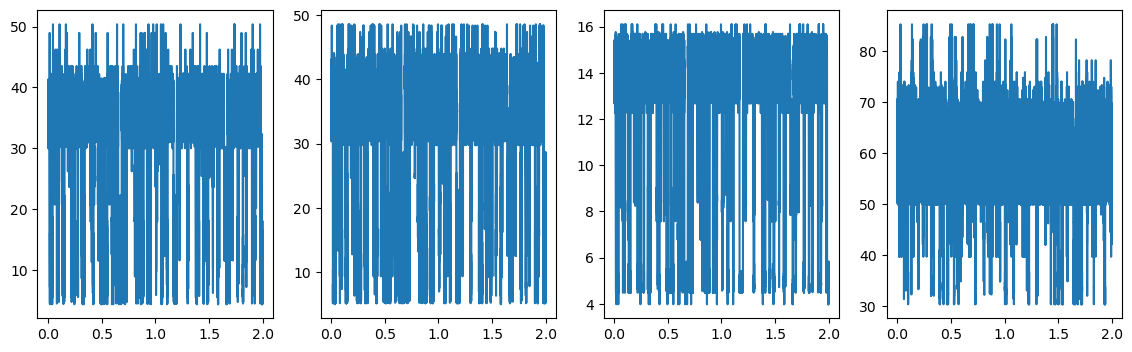

In [31]:
fig, ax = plt.subplots(ncols=4, figsize=(14,4))
ax[0].plot(x, mapped_traj[0][:steps,0])
ax[1].plot(x, mapped_traj[0][:steps,1])
ax[2].plot(x, mapped_traj[0][:steps,2])
ax[-1].plot(x, mapped_traj[0][:steps,3])

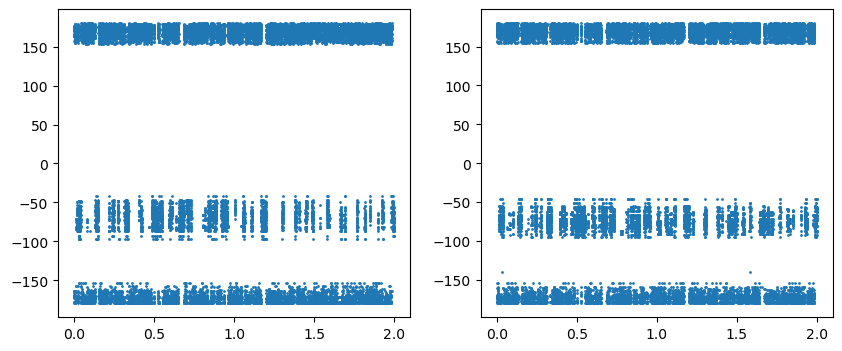

In [32]:
fig, ax = plt.subplots(ncols=2, figsize=(10,4))
ax[0].scatter(x, mapped_traj[0][:steps,4], s=1)
ax[1].scatter(x, mapped_traj[0][:steps,5], s=1)

#### Pdists

In [33]:
import mdap

(<Figure size 640x480 with 2 Axes>, <Axes: >)

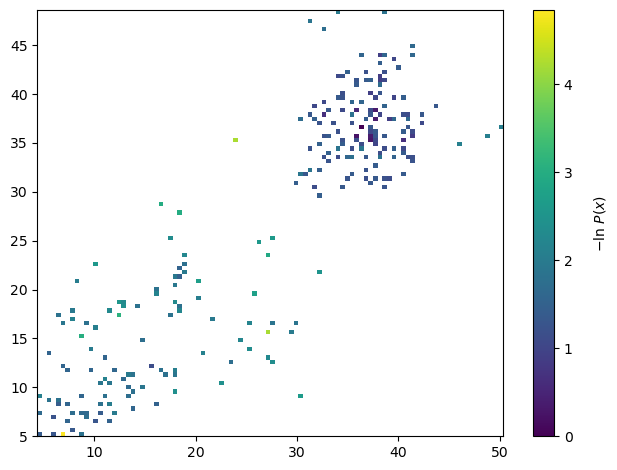

In [34]:
mdap.MD_Plot(Xname=mapped_traj[0][:,0], Xindex=0, Yname=mapped_traj[0][:,1], Yindex=0, data_type="pdist").plot()

#### Now assign state labels to each cluster center
Then get mfpt of the D1<-->D2 interconversion process

In [77]:
backmapper

{0: array([  4.77219963,   7.3592    ,   4.4804    ,  51.88809967,
        -87.27320862, -77.54160309]),
 1: array([ 36.04339981,  38.47430038,  14.228     ,  55.29389954,
        178.18579102, 165.48548889]),
 2: array([ 18.14169884,  20.65819931,   8.63210011,  32.35569763,
        168.49539185, -62.6576004 ]),
 3: array([ 14.05109978,   7.81619978,   4.8489    ,  47.92959976,
        -66.60560608, -72.4285965 ]),
 4: array([ 39.82769775,  42.65999985,  15.25689983,  70.5460968 ,
        173.01791382, 175.7848053 ]),
 5: array([  18.61839867,   17.7656002 ,    6.7656    ,   46.33819962,
         -65.90750885, -171.13938904]),
 6: array([  31.12109947,   37.69610214,   13.7026    ,   54.24900055,
         164.20439148, -172.95570374]),
 7: array([ 18.24239922,  18.30189896,   4.8504    ,  63.93740082,
        -64.09080505, -55.54860687]),
 8: array([  9.75969982,  13.72509956,   5.24790001,  63.92769623,
        -60.019104  , -60.7148056 ]),
 9: array([  37.3689003 ,   35.68169785,   

In [106]:
d1 = []
d2 = []
neither = []
for ci, pcoords in backmapper.items():
    if pcoords[0] < 10 and pcoords[1] < 10 and pcoords[2] < 5 and pcoords[3] > 40 and -95 < pcoords[4] < -40 and -95 < pcoords[5] < -40:
        d2.append(ci)
    elif pcoords[0] > 32 and pcoords[1] > 32 and pcoords[2] > 13 and pcoords[3] > 40:
        d1.append(ci)
    else:
        neither.append(ci)

In [107]:
len(d1), len(d2), len(neither)

(118, 16, 116)

In [108]:
backmapper[4]

array([ 39.82769775,  42.65999985,  15.25689983,  70.5460968 ,
       173.01791382, 175.7848053 ])

#### MFPT from set A to set B (in units of input trajectory, which in this case is the MSM lagtime since using SynD traj)

In [111]:
d1d2 = final_msm.mfpt(4, d1)

In [112]:
d1d2

0.0

In [105]:
d2d1 = final_msm.mfpt(d2, d1)

In [110]:
d1d2, d2d1

(45239.87696107853, 17858.572534782095)

In [94]:
d1d2, d2d1

(57352.91805753011, 17858.572534782095)

In [56]:
1/d1d2

1.7464910475618084e-05

In [57]:
# mfpt in milliseconds (20ns MSM lagtime)
d1d2 * 20 / 1000 / 1000

1.145153307709251

In [43]:
# rate per s (exp is ~60/s)
1 / (d1d2 * 20 / 1000 / 1000 / 1000)

871.7952232150685

In [46]:
# rate per s (exp is ~60/s)
0.004 * 20 / 1000 / 1000 / 1000

8.000000000000001e-11

In [47]:
1/(250*(20/1000/1000/1000))

199999.99999999997

In [104]:
1/(250*20/1000/1000/1000)

199999.99999999997

In [48]:
# 4us = 4000000 ps / 100 ps timesteps
4000000 / 100

40000.0

So it takes maybe 40000 iterations on average.

In [49]:
# 1.15ms = 1150000 ns / 20 ns
1150000 / 20

57500.0

---
Okay, let's see if we can get errors from bMSM:

In [155]:
flux_d1d2 = final_bmsm.evaluate_samples('reactive_flux', source_states=d1, target_states=d2)

In [156]:
flux_d2d1 = final_bmsm.evaluate_samples('reactive_flux', source_states=d2, target_states=d1)

In [157]:
def calc_bmsm_flux_errors(bmsm_fluxes):
    """
    Returns the mean +/- std for bmsm reactive flux: 
    mean rate, std rate, mean mfpt, std mfpt
    """
    rates = []
    mfpts = []
    for m in bmsm_fluxes:
        rates.append(m.rate)
        mfpts.append(m.mfpt)
    return {"mean rate":np.mean(rates), "std rate":np.std(rates), 
            "mean mfpt":np.mean(mfpts), "std mfpt":np.std(mfpts)}

In [158]:
calc_bmsm_flux_errors(flux_d1d2)

{'mean rate': 0.0034963292001660064,
 'std rate': 8.341959554103632e-05,
 'mean mfpt': 286.1758066819546,
 'std mfpt': 6.776003126333765}

In [159]:
calc_bmsm_flux_errors(flux_d2d1)

{'mean rate': 0.010657319235735697,
 'std rate': 0.0003695205308079957,
 'mean mfpt': 93.94586889763232,
 'std mfpt': 3.280075315918635}

If you have some $X$ and its standard deviation $s$, then the derivative of $\frac{1}{X}$ w.r.t. $X$ is $\frac{-1}{X^2}$, and the standard deviation of $\frac{1}{X}$ is approximately $\frac{s}{X^2}$. The approximation gets worse as $s$ becomes larger relative to $X$.

For instance if X = 10±1, then 1/X is approximately 0.1±.01. (Which you can confirm by experiment, seeing that X=9 or X=11 maps to 1/X=0.111 and 1/X=0.091. X=8 or X=12 maps to 1/X=0.125 and 0.083)

In [164]:
# error_k = error_mfpt / mfpt**2
3.28 / 93.46**2

0.00037551067734844953

Seems that either error propagation or percent error works.

In [189]:
# percent error
a = 3.28 / 93.46
a, 0.010657 * a

(0.03509522790498609, 0.0003740098437834368)

#### Now with mfpts directly

In [139]:
bd1d2 = final_bmsm.gather_stats('mfpt', A=d1, B=d2)
bd2d1 = final_bmsm.gather_stats('mfpt', A=d2, B=d1)

In [140]:
bd1d2.mean, bd1d2.std

(57314.678946671884, 1355.3914075572645)

In [141]:
bd2d1.mean, bd2d1.std

(18801.13190553198, 655.8838575856645)

In [181]:
# percent error
pe_d1d2 = bd1d2.std / bd1d2.mean
pe_d2d1 = bd2d1.std / bd2d1.mean

In [182]:
pe_d1d2, pe_d2d1

(0.02364824216878857, 0.03488533886583071)

In [142]:
def convert(x):
    """
    For 20 ns lagtime, convert mfpt from msm lagtime to seconds.
    """
    return (x * 20) / 1000 / 1000 / 1000

In [183]:
# convert mfpt to seconds and then convert to rate
kd1d2 = 1 / convert(bd1d2.mean)
kd2d1 = 1 / convert(bd2d1.mean)

# error_k = error_mfpt / mfpt**2
#sd1d2 = bd1d2.std / bd1d2.mean**2
#sd2d1 = bd2d1.std / bd2d1.mean**2

# percent error
sd1d2 = kd1d2 * pe_d1d2
sd2d1 = kd2d1 * pe_d2d1

Now propagate error to get $K_{ex}=\frac{k_{12}}{k_{21}}$

In [184]:
Kex = kd1d2 / kd2d1

Error propagation from division of rates:

Given $z = \frac{x}{y}$ :

$\frac{\Delta{Z}}{Z} = \sqrt{(\frac{\Delta{x}}{x})^2 + (\frac{\Delta{y}}{y})^2 + ...}$

Solving for $\Delta{Z}$:

In [185]:
K_error = Kex * np.sqrt((sd1d2 / kd1d2)**2 + (sd2d1 / kd2d1)**2)

In [186]:
kd1d2, kd2d1

(872.3768660821116, 2659.4143507544973)

In [193]:
print(f"k_12 = {kd1d2:0.3f} ± {sd1d2:0.3f}")
print(f"k_21 = {kd2d1:0.3f} ± {sd2d1:0.3f}")
print(f"K_ex = {Kex:0.3f} ± {K_error:0.5f}")

k_12 = 872.377 ± 20.630
k_21 = 2659.414 ± 92.775
K_ex = 0.328 ± 0.01383


In [190]:
sd1d2

20.63017939155861

In [191]:
sd2d1

92.7745708107238